In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!cp '/content/drive/My Drive/tumor dataset.zip' .
!unzip -qq 'tumor dataset.zip' -d . 

In [3]:
import shutil
import os
# shutil.rmtree("/content/new")
os.mkdir("/content/new")

In [4]:
import sys
sys.path.append('/content/drive/My Drive/ML_BIO_HW5/HW10')
import crop

In [5]:
import numpy as np
import os
import matplotlib.image as image

data_dir = "/content/yes"
dest_dir = "/content/new"
patients = sorted(os.listdir(data_dir))
print(len(patients))
number = 0
for i, patient in enumerate(patients):
    p_dir = os.path.join(data_dir, patient)
    d_dir = os.path.join(dest_dir, str(number)+".jpg")
    print(d_dir)
    img=image.imread(p_dir,".jpg")
    print(img.shape)
    img = np.expand_dims(img, 0)
    # print(img.shape)
    img = crop.crop_imgs(img)
    print(img.shape)
    image.imsave(d_dir,img[0],cmap='gray')
    number += 1
data_dir = "/content/no"
patients = sorted(os.listdir(data_dir))
print(len(patients))
for i, patient in enumerate(patients):
    p_dir = os.path.join(data_dir, patient)
    d_dir = os.path.join(dest_dir, str(number)+".jpg")
    print(p_dir)
    img=image.imread(p_dir,".jpg")
    print(img.shape)
    img = np.expand_dims(img, 0)
    # print(img.shape)
    img = crop.crop_imgs(img)
    print(img.shape)
    image.imsave(d_dir,img[0],cmap='gray')
    number += 1


155
/content/new/0.jpg
(218, 180, 3)
(218, 180)
(1, 165, 137)
/content/new/1.jpg
(360, 319)
(360, 319)
(1, 359, 318)
/content/new/2.jpg
(348, 287, 3)
(348, 287)
(1, 300, 229)
/content/new/3.jpg
(336, 300)
(336, 300)
(1, 300, 243)
/content/new/4.jpg
(630, 587, 3)
(630, 587)
(1, 627, 525)
/content/new/5.jpg
(993, 825, 3)
(993, 825)
(1, 982, 789)
/content/new/6.jpg
(890, 700, 3)
(890, 700)
(1, 889, 662)
/content/new/7.jpg
(246, 205, 3)
(246, 205)
(1, 232, 161)
/content/new/8.jpg
(253, 200, 3)
(253, 200)
(1, 245, 197)
/content/new/9.jpg
(512, 512, 3)
(512, 512)
(1, 417, 352)
/content/new/10.jpg
(1200, 1059, 3)
(1200, 1059)
(1, 1054, 812)
/content/new/11.jpg
(279, 258, 3)
(279, 258)
(1, 278, 257)
/content/new/12.jpg
(369, 400, 3)
(369, 400)
(1, 358, 388)
/content/new/13.jpg
(324, 272, 3)
(324, 272)
(1, 323, 271)
/content/new/14.jpg
(366, 310, 3)
(366, 310)
(1, 340, 298)
/content/new/15.jpg
(312, 254, 3)
(312, 254)
(1, 298, 242)
/content/new/16.jpg
(249, 178, 3)
(249, 178)
(1, 181, 134)
/con

In [6]:
from Dataset import toumorDataset

In [7]:
from torchvision import transforms
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.RandomRotation(degrees=45),
                                transforms.Resize((64,64), interpolation=2),
                                transforms.ToTensor()])

                                      
                                      # transforms.RandomRotation(degrees=45, fill=(0,)),
                                      # transforms.CenterCrop(128),
                                      # transforms.ToTensor(),
                                      # transforms.Normalize((0.5), (1))


In [8]:
import torch
import torch.nn as nn
from torch.nn import init 
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms, datasets, models
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd
import copy
import random
from scipy.special import comb
import os
import matplotlib.image as image
from scipy.ndimage.interpolation import rotate
from skimage import io
from torchvision import transforms
from collections import defaultdict
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import shutil

In [9]:
trainvalid_split = 0.95
train_split = 0.9
batch_size = 10

dataset_dir = '/content/new/'

dataset = toumorDataset(dataset_dir,transform= transform)

dataset_size = len(dataset)
trainvalid_size = int(np.floor(trainvalid_split * dataset_size))
test_size = dataset_size - trainvalid_size

trainvalid_set, test_set = torch.utils.data.random_split(dataset, [trainvalid_size, test_size])

dataset_size = len(trainvalid_set)
train_size = int(np.floor(train_split * dataset_size))
valid_size = dataset_size - train_size

train_set, valid_set = torch.utils.data.random_split(trainvalid_set, [train_size, valid_size])

train_samples_weights = torch.from_numpy(np.true_divide(np.ones(len(train_set)),len(train_set)))
print(train_samples_weights)
train_sampler = WeightedRandomSampler(weights=train_samples_weights, num_samples=len(train_samples_weights), replacement=True)

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, sampler=train_sampler),
    'val': DataLoader(valid_set, batch_size=batch_size, )
}



tensor([0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046, 0.0046,
        0.0046, 0.0046, 0.0046, 0.0046, 

In [15]:
s = dataset.__getitem__(0)

In [ ]:
len(dataloaders["val"])

3

In [11]:
import Resnet

In [27]:

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False)

def conv5x5(in_planes, out_planes, stride=1, groups=1, dilation=2):
    """5x5 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=5, stride=stride,
                     padding=dilation, groups=groups, bias=False)

def conv7x7(in_planes, out_planes, stride=1, groups=1, dilation=3):
    """7x7 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=7, stride=stride,
                     padding=dilation, groups=groups, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):

    def __init__(self, inplanes, planes ,batchNormalization, dropOut, stride=1, downsample=None, groups=1,
                 dilation=1, norm_layer=None ,num=1):
        super(BasicBlock, self).__init__()
        self.batchNormalization = batchNormalization
        self.dropOut = dropOut
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d

        if num == 1:
            self.conv1 = conv7x7(inplanes, planes, stride)
            if self.batchNormalization == True:
                self.bn1 = norm_layer(planes)
            self.relu = nn.ReLU(inplace=True)
            if self.dropOut == True:
                self.do = nn.Dropout(p=0.3, inplace=False)
            self.conv2 = conv7x7(planes, planes)
            if self.batchNormalization == True:
                self.bn2 = norm_layer(planes)
            self.downsample = downsample
            self.stride = stride
        elif num == 2:
            self.conv1 = conv5x5(inplanes, planes, stride)
            if self.batchNormalization == True:
                self.bn1 = norm_layer(planes)
            self.relu = nn.ReLU(inplace=True)
            if self.dropOut == True:
                self.do = nn.Dropout(p=0.3, inplace=False)
            self.conv2 = conv5x5(planes, planes)
            if self.batchNormalization == True:
                self.bn2 = norm_layer(planes)
            self.downsample = downsample
            self.stride = stride
        elif num == 3:
            self.conv1 = conv3x3(inplanes, planes, stride)
            if self.batchNormalization == True:
                self.bn1 = norm_layer(planes)
            self.relu = nn.ReLU(inplace=True)
            if self.dropOut == True:
                self.do = nn.Dropout(p=0.3, inplace=False)
            self.conv2 = conv3x3(planes, planes)
            if self.batchNormalization == True:
                self.bn2 = norm_layer(planes)
            self.downsample = downsample
            self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        if self.batchNormalization == True:
            out = self.bn1(out)
        out = self.relu(out)
        if self.dropOut == True:
            out = self.do(out)

        out = self.conv2(out)
        if self.batchNormalization == True:
            out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(self, block, layers, batchNormalization, dropOut, num_classes=2, zero_init_residual=False,
                 groups=1, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer
        self.batchNormalization = batchNormalization
        self.dropOut = dropOut
        self.inplanes = 8
        self.dilation = 1

        self.groups = groups
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=3, stride=1, padding=1,
                               bias=False)
        if self.batchNormalization == True:
            self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        if self.dropOut == True:
            self.do = nn.Dropout(p=0.3, inplace=False)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        downsample = nn.Sequential(
            conv1x1(8, 16, 1),
        )
        self.layer1 = block(8, 16, batchNormalization, dropOut, 1, downsample, self.groups, norm_layer, num=1)
        downsample1 = nn.Sequential(
            conv1x1(16, 32, 2),
        )
        self.layer2 = block(16, 32, batchNormalization, dropOut, 2, downsample1, self.groups, norm_layer, num=2)
        downsample3 = nn.Sequential(
            conv1x1(32, 64, 2),
        )
        self.layer3 = block(32, 64, batchNormalization, dropOut, 2, downsample3, self.groups, norm_layer, num=3)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Sequential(nn.Linear(64, 2),
                                nn.LogSoftmax(dim=1))

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        print(self.batchNormalization)
        x = self.conv1(x)
        # print("1",x.shape)
        if self.batchNormalization == True :
            print("here")
            x = self.bn1(x)
        # print("2",x.shape)
        x = self.relu(x)
        if self.dropOut == True:
            x = self.do(x)
        # print("3",x.shape)
        x = self.maxpool(x)
        # print("4",x.shape)

        x = self.layer1(x)
        # print("5",x.shape)
        x = self.layer2(x)
        # print("6",x.shape)
        x = self.layer3(x)
        # print("7",x.shape)

        x = self.avgpool(x)
        # print("8",x.shape)
        x = torch.flatten(x, 1)
        # print("9",x.shape)
        x = self.fc(x)
        # print("10",x.shape)

        return x

    def forward(self, x):
        return self._forward_impl(x)


def resnet(batchNormalization, dropOut, **kwargs):
    model = ResNet(BasicBlock, [1, 1, 1], batchNormalization, dropOut, **kwargs)
    return model


In [33]:

def calc_loss(pred, target, metrics, bce_weight=0.5):
    # bce = F.binary_cross_entropy_with_logits(pred, target)
        
    # pred = torch.sigmoid(pred)
    # dice = dice_loss(pred, target)
    
    # loss = bce * bce_weight + dice * (1 - bce_weight)
    
    # metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    # metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    
    loss = nn.CrossEntropyLoss() 
    output = loss(pred, target)
    # print(output)
    metrics['loss'] += output.data.cpu().numpy() * target.size(0)
    # return loss
    return output

def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    # current_loss = 0.0
    current_corrects = 0
    total = 0
    train_acc = []
    val_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
 
        
        since = time.time()

        for phase in ['train', 'val']:
            if phase == 'train':
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
                    
                model.train()
            else:
                model.eval()
            metrics = defaultdict(float)
            epoch_samples = 0
            
            for inputs, labels in dataloaders[phase]:
                
                inputs = ((inputs.reshape(-1,3,64,64)).float()).to(device)
                labels = (labels).to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs.float())

                    _, preds = torch.max(outputs, 1)
                    # print("preds",preds)
                    # print("labels",labels)
                    loss = calc_loss(outputs, labels, metrics)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                epoch_samples += inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)
                total += len(labels)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples
            epoch_acc = current_corrects.double() / total
            print("epoch_acc",epoch_acc)
            if phase == 'train':
                train_acc.append(epoch_acc)
            elif phase == 'val':
                val_acc.append(epoch_acc)

            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())


        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    
            
    print('Best val loss: {:4f}'.format(best_loss))

    model.load_state_dict(best_model_wts)
    return model,train_acc,val_acc

In [34]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)



model1 = Resnet.resnet(batchNormalization=False, dropOut= False).to(device)
model1.float()
print(model1.children)

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model1.parameters()), lr=1e-3)

lr_scheduler = ReduceLROnPlateau(optimizer_ft, "min", factor=0.8, patience=10, verbose=True)      
              
model1,tain_acc1,val_acc1 = train_model(model1, optimizer_ft, lr_scheduler, num_epochs=100)

cuda:0
<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): BasicBlock(
    (conv1): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (downsample): Sequential(
      (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (layer2): BasicBlock(
    (conv1): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (downsample): Sequential(
      (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
    )
  )
  (layer3): BasicBlock(
    (conv1): Conv2d(32, 64

In [35]:

#with batch normalization
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)



model2 = Resnet.resnet(batchNormalization=True, dropOut= False).to(device)
model2.float()
print(model2.children)


optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=1e-3)

lr_scheduler = ReduceLROnPlateau(optimizer_ft, "min", factor=0.8, patience=10, verbose=True)      
              
model2,tain_acc2,val_acc2 = train_model(model2, optimizer_ft, lr_scheduler, num_epochs=100)

cuda:0
<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): BasicBlock(
    (conv1): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (layer2): BasicBlock(
    (conv1): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (bn1): Batc

In [36]:

#wiith drop out
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 1

model3 = Resnet.resnet(batchNormalization=False, dropOut= True).to(device)
model3.float()
print(model3.children)



optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model3.parameters()), lr=1e-3)

lr_scheduler = ReduceLROnPlateau(optimizer_ft, "min", factor=0.8, patience=10, verbose=True)      
              
model3,tain_acc3,val_acc3 = train_model(model3, optimizer_ft, lr_scheduler, num_epochs=100)

cuda:0
<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (relu): ReLU(inplace=True)
  (do): Dropout(p=0.3, inplace=False)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): BasicBlock(
    (conv1): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (relu): ReLU(inplace=True)
    (do): Dropout(p=0.3, inplace=False)
    (conv2): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (downsample): Sequential(
      (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (layer2): BasicBlock(
    (conv1): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False)
    (relu): ReLU(inplace=True)
    (do): Dropout(p=0.3, inplace=False)
    (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (downsample): Sequential(
      (0): Conv

In [37]:

#wiith drop out and batch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


model4 = Resnet.resnet(batchNormalization=True, dropOut= True).to(device)
model4.float()
print(model4.children)



optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model4.parameters()), lr=1e-3)

lr_scheduler = ReduceLROnPlateau(optimizer_ft, "min", factor=0.8, patience=10, verbose=True)      
              
model4,tain_acc4,val_acc4 = train_model(model4, optimizer_ft, lr_scheduler, num_epochs=100)

cuda:0
<bound method Module.children of ResNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (do): Dropout(p=0.3, inplace=False)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): BasicBlock(
    (conv1): Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (do): Dropout(p=0.3, inplace=False)
    (conv2): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (layer2): BasicBlock(
    (conv1): Conv2d(16, 32, 

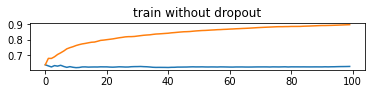

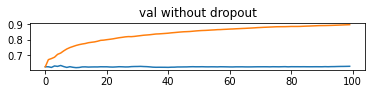

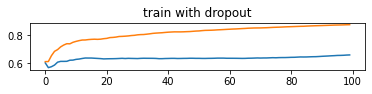

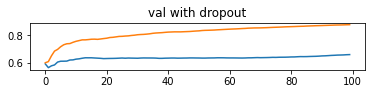

In [38]:
#A
import matplotlib.pyplot as plt
plt.subplot(4,1,1)
plt.title('train without dropout')
plt.plot(tain_acc1)
plt.plot(tain_acc2)
plt.show()

plt.subplot(4,1,2)
plt.title('val without dropout')
plt.plot(val_acc1)
plt.plot(val_acc2)
plt.show()

plt.subplot(4,1,3)
plt.title('train with dropout')
plt.plot(tain_acc3)
plt.plot(tain_acc4)
plt.show()

plt.subplot(4,1,4)
plt.title('val with dropout')
plt.plot(val_acc3)
plt.plot(val_acc4)
plt.show()

می‌توان دید با اضافه کردن این لایه دقت به  میزان زیادی با وجود لایه‌ی دراپ‌‌ات و بدون آن هم در ترین و هم در ولیدیشن افزایش یافته است.



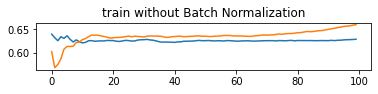

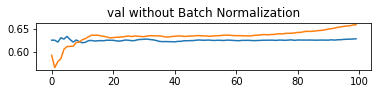

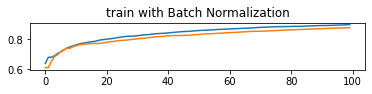

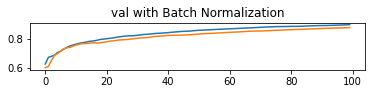

In [39]:
#B
import matplotlib.pyplot as plt
plt.subplot(4,1,1)
plt.title('train without Batch Normalization')
plt.plot(tain_acc1)
plt.plot(tain_acc3)
plt.show()

plt.subplot(4,1,2)
plt.title('val without Batch Normalization')
plt.plot(val_acc1)
plt.plot(val_acc3)
plt.show()

plt.subplot(4,1,3)
plt.title('train with Batch Normalization')
plt.plot(tain_acc2)
plt.plot(tain_acc4)
plt.show()

plt.subplot(4,1,4)
plt.title('val with Batch Normalization')
plt.plot(val_acc2)
plt.plot(val_acc4)
plt.show()

می‌توان دید با افزودن آن در حالتی که بچ‌نرمالیزیشن وجود ندارد افزایش یافته. اما وقتی بچ‌نرمالیزیشن وجود دارد به دلیل اینکه خود بچ‌نرمالیزیشن یک رگیولایزر است دقت کمی کاهش می‌یابد.

In [41]:
#C
model_children=list(model1.children())
model_weights = []
conv_layers = [] 

counter = 0 
for i in range(len(model_children)):
  print(type(model_children[i]))

for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
    else:
        # print(list(model_children[i].children()))
        for child in model_children[i].children():
            if type(child) == nn.Conv2d:
                counter += 1
                model_weights.append(child.weight)
                conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'Resnet.BasicBlock'>
<class 'Resnet.BasicBlock'>
<class 'Resnet.BasicBlock'>
<class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>
<class 'torch.nn.modules.container.Sequential'>
Total convolutional layers: 7


In [42]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([8, 3, 3, 3])
CONV: Conv2d(8, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([16, 8, 7, 7])
CONV: Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False) ====> SHAPE: torch.Size([16, 16, 7, 7])
CONV: Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), bias=False) ====> SHAPE: torch.Size([32, 16, 5, 5])
CONV: Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False) ====> SHAPE: torch.Size([32, 32, 5, 5])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 32, 3, 3])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False) ====> SHAPE: torch.Size([64, 64, 3, 3])


In [43]:
import matplotlib.pyplot as plt

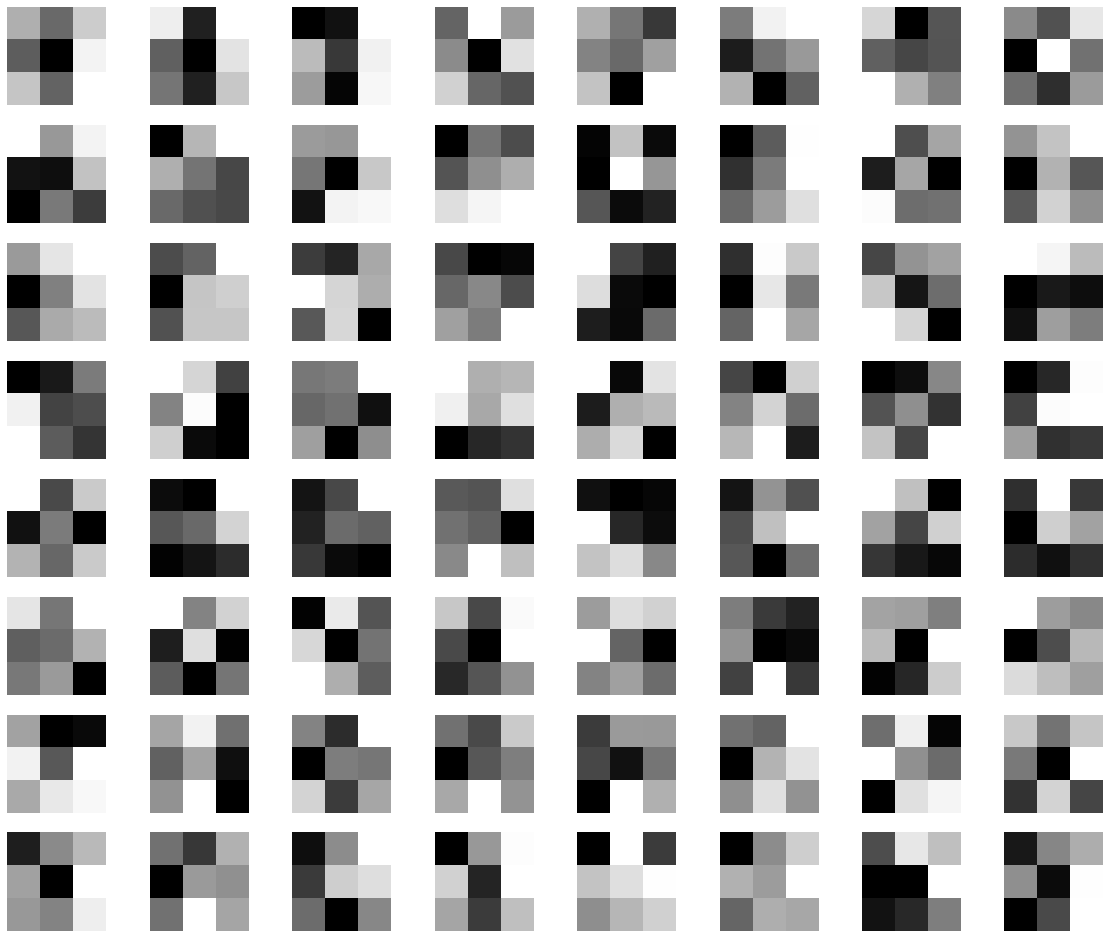

In [45]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[6]):
    plt.subplot(8, 8, i+1) 
    plt.imshow(filter[0, :, :].to("cpu").detach(), cmap='gray')
    plt.axis('off')
    plt.savefig('/content/filter7.png')
plt.show()

In [46]:
s = dataset.__getitem__(0)
print(s[0].shape)

torch.Size([1, 3, 64, 64])


In [55]:
results = [conv_layers[0].to("cpu")(s[0])]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i].to("cpu")(results[-1]))
outputs = results

In [56]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        if i == 64: 
            break
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    print("Saving layer {"+str(num_layer)+"} feature maps...")
    plt.savefig("/content/layer_{"+str(num_layer)+"}.png")
    # plt.show()
    plt.close()

torch.Size([8, 64, 64])
Saving layer {0} feature maps...
torch.Size([16, 64, 64])
Saving layer {1} feature maps...
torch.Size([16, 64, 64])
Saving layer {2} feature maps...
torch.Size([32, 32, 32])
Saving layer {3} feature maps...
torch.Size([32, 32, 32])
Saving layer {4} feature maps...
torch.Size([64, 16, 16])
Saving layer {5} feature maps...
torch.Size([64, 16, 16])
Saving layer {6} feature maps...


با مشاهده‌‌ی نتیجه و شکل‌ها می‌توان  فهمید که مپ های تشکیل شده در لایه‌های  اول واضح‌‌تر و در لایه‌های آخر ناواضح‌تر می‌‌باشد. در نتیجه در لایه‌های اول  به ویژگی‌های کلی مثل سایه‌ها و لبه‌ها توجه می‌کند ولی  در لایه های آخر  به ویژگی‌های اختصاصی‌تر مثل وجود  با عدم وجود تومور دقت ‌می‌‌کند.